## Load The Model

In [0]:
#First you Need To Run The Defination Of Model 
#Then Run This Below
model_save_name = 'predict_linear_reg.pt'
path = F"/content/drive/My Drive/{model_save_name}"
model_1.load_state_dict(torch.load(path))


<All keys matched successfully>

##Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import numpy.ma as ma


In [0]:
data=pd.read_csv('DATA1.csv')


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Display all Data 

In [0]:
def display_all(data):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(data)

##Assign Features and Labeles

In [0]:
data1=(data-data.mean())/data.std()
x_1 = data[['Per_min_OnRoad','Per_hours_At_College','Per_days_attendance']]

X_1 = np.array(x_1)
y_1 = data[['GPA']]
y_1.head()
Y_1 = np.array(y_1)


In [0]:
data.head

<bound method NDFrame.head of       GPA  Per_min_OnRoad  Per_hours_At_College  Per_days_attendance
0    2.04             240                   4.0                  4.0
1    3.22             120                   7.0                  5.0
2    2.92              30                   4.0                  5.0
3    3.50              60                   5.0                  4.0
4    2.86             140                   4.0                  4.0
..    ...             ...                   ...                  ...
237  3.03             120                   4.0                  5.0
238  2.68             120                   4.0                  4.0
239  2.50              45                   3.0                  1.0
240  2.65              35                   4.0                  2.0
241  3.30             200                   6.0                  4.0

[242 rows x 4 columns]>

##Visualize Data

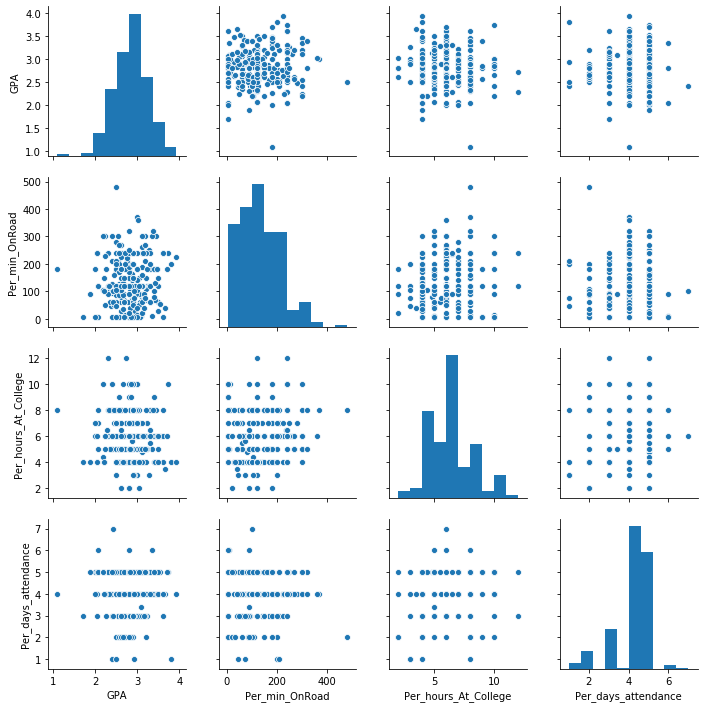

In [0]:
sb.pairplot(data)


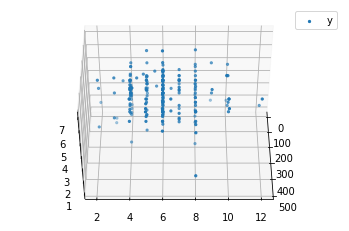

In [0]:
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(X_1[:, 0], X_1[:, 1],X_1[:,2], label ='y', s =5) 
ax.legend() 
ax.view_init(45, 0) 
  
plt.show() 

##<h2>Covariance Matrix and Mean


In [0]:
cov=np.cov(X_1,y=None, rowvar=False, bias=False, ddof=None, fweights=None, aweights=None)
mean=np.mean(X_1,axis=0)

##Generating New Data from Old Distribution Data 




In [0]:
Size_of_Data=500
New_Data= np.random.multivariate_normal(mean, cov,Size_of_Data)
New_Data.shape

(500, 3)

##<h3 color='red'> Ploting Old Data and New Data</h3>

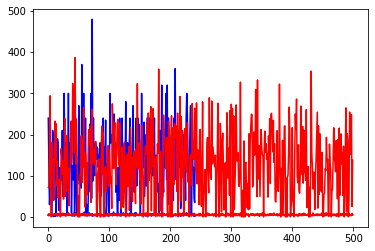

In [0]:
New_Data[New_Data < 0] = 0
plt.plot(x_1,color='blue')
plt.plot(New_Data,color='r')
plt.show()

##This Function Delete rows whose Values = 0

In [0]:
#Function Clean Data Whose Values Are 0
def Delete_Zeros(New_Data):
  index=[]
  for i in New_Data :
    if np.count_nonzero(i == 0) > 0 or np.count_nonzero(i ==( 0)):
        index.append(np.where(np.all(New_Data==i,axis=1))[0][0])
  cleaned_data=np.delete(New_Data,index,0) 
  return cleaned_data

Cleaned_data1=Delete_Zeros(New_Data)

In [0]:
#function Delete rows whose values >6 Days
def constrains_per_day(cleaned_data1):
  x=[]
  for i in range(len(cleaned_data1)):
    if cleaned_data1[i][2]>6:
      x.append(i)  
  cleaned_data2=np.delete(cleaned_data1,x,0)
  return cleaned_data2
Cleaned_data2=constrains_per_day(Cleaned_data1)



In [0]:
#This function delete rows whose Values >10 hours
def constrains_per_hours(Cleaned_data2):
  x=[]
  for i in range(len(Cleaned_data2)):
    if Cleaned_data2[i][1]>10:
      x.append(i)  
  cleaned_data3=np.delete(Cleaned_data2,x,0)
  return cleaned_data3

Cleaned_data3=constrains_per_hours(Cleaned_data2)



In [0]:
#This function delete rows whose values <5 min and >300 min
def constrains_per_min_Road(Cleaned_data3):
  x=[]
  for i in range(len(Cleaned_data3)):
    if Cleaned_data3[i][0]<5 or Cleaned_data3[i][0]>300:
      x.append(i)  
  cleaned_data4=np.delete(Cleaned_data3,x,0)
  return cleaned_data4

Final_Data=constrains_per_min_Road(Cleaned_data3)


##<h1 color="blue">Ploting The New Data After Cleaning and Old Data</h1>

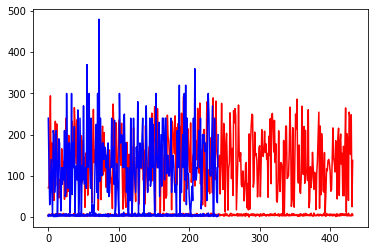

In [0]:
# The New Data Represented by red Color 
plt.plot(Final_Data,color='r')
plt.plot(data,color='blue')
plt.show()

##<h1>The Percentage of data After Cleaning</h1>

In [0]:
Size_After_cleaning=Final_Data.shape[0]
def Percentage_Of_Cleaning(Size_of_Data,Size_After_cleaning):
   result=((Size_of_Data-Size_After_cleaning)/Size_of_Data)*100
   print(result)
Percentage_Of_Cleaning(Size_of_Data,Size_After_cleaning)

13.4


## **We Dont Need To Run Next Cells Untill "Thinking In Tensors"**!


In [0]:
#BALBLABLA

##<h1>KNN For Testing Distance between two classes</h1>

In [0]:
ones=np.ones(242)


In [0]:
shape = Final_Data.shape[0]
shape

457

In [0]:
zeros=np.zeros(shape)
# column_to_be_added_zeros = np.array(zeros)
# class_zeros = np.column_stack((X, column_to_be_added_zeros))
# class_zeros

In [0]:
Merge_data=np.concatenate((X_1, Final_Data), axis=0)
Y_label=np.concatenate((ones,zeros),axis=0)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Merge_data,Y_label, test_size=0.2) # change test_size and no of features

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=100)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [0]:
from sklearn import metrics

y_pred = classifier.predict(X_test)
print(metrics.accuracy_score( y_pred,y_test))

0.6142857142857143


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test))

[[86  0]
 [54  0]]
              precision    recall  f1-score   support

         0.0       1.00      0.61      0.76       140
         1.0       0.00      0.00      0.00         0

    accuracy                           0.61       140
   macro avg       0.50      0.31      0.38       140
weighted avg       1.00      0.61      0.76       140



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

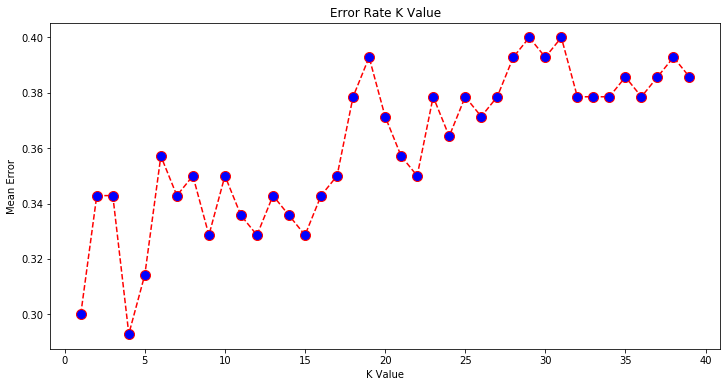

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##<h1>categoreis GPA</h1>

In [0]:
def gpa_cat(data):
  data = np.where((data >= 2.0 ) & (data < 2.4),-2,data) #pass
  data = np.where((data < 2.0) & (data >= 1.0),-1,data) #fail
  data = np.where(data>=3.4,0,data)#excellent
  data = np.where((data >= 2.8) & (data < 3.4),1,data)#very good
  data = np.where((data >= 2.4) & (data < 2.8),2,data)#good
  data_1 = data.astype(int)
  return data_1
print(gpa_cat(Y_1))

[[-2]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 0]
 [ 2]
 [ 2]
 [ 2]
 [-2]
 [ 0]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 1]
 [ 0]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [-2]
 [ 1]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [-2]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [-2]
 [-2]
 [ 2]
 [-1]
 [ 2]
 [-2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 0]
 [ 2]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 0]
 [ 1]
 [-2]
 [ 1]
 [ 0]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [-2]
 [ 2]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [-2]
 [ 2]
 [ 1]
 [ 0]
 [-2]
 [ 2]
 [ 1]
 [ 1

## Prototype Linear Regression Without Normlization and Category

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:

X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.2, random_state=0)

In [0]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)



In [0]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.347916237245642
Mean Squared Error: 0.20058383518005063
Root Mean Squared Error: 0.44786586739787465


In [0]:
#f = X_train1[:,0]
#plt.scatter(f, y_train1,color='g')
#y_pred1.shape
#plt.plot(f, y_train1,color='r')

In [0]:
Reg_coef=regressor.coef_
Reg_inte=regressor.intercept_

In [0]:
#for i in range (35):
 # print(y_test1[i])
  #print("--------------")
  #print(y_pred1[i])

##Linear Regression With Normalization and Category

In [0]:
data1=(data-data.mean())/data.std()
x_1 = data[['Per_min_OnRoad','Per_hours_At_College','Per_days_attendance']]

X_1 = np.array(x_1)
y_1 = data[['GPA :']]
y_1.head()
Y_1 = np.array(y_1)

In [0]:
 Y_label=gpa_cat(Y_1)
X_train, X_test, y_train, y_test = train_test_split(x_1, Y_label, test_size=0.2, random_state=0)

In [0]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8882883933697403
Mean Squared Error: 1.6856596063655918
Root Mean Squared Error: 1.2983295445939724


##Generate New Data with coefficient

In [0]:
coef=Reg_coef.reshape(3,1)
res= np.dot(Final_Data, coef)


In [0]:
Merge_data=np.concatenate((x_1, Final_Data), axis=0)


In [0]:
Merge_Labels=np.concatenate((Y_1,res),axis=0)


##Train New Model With Merging Data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Merge_data,Merge_Labels, test_size=0.2, random_state=0)

In [0]:
Regress = LinearRegression()
Regress.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)


In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1583849750644901
Mean Squared Error: 1.618800035830954
Root Mean Squared Error: 1.272320728366458


In [0]:
for i in range (35):
  print(y_test[i])
  print("--------------")
  print(y_pred[i])

[0.04915493]
--------------
[1.10445707]
[0.07333286]
--------------
[1.0801169]
[2.4]
--------------
[0.82993466]
[0.06399904]
--------------
[1.19636439]
[2.5]
--------------
[0.97394138]
[2.23]
--------------
[0.99105005]
[0.12250688]
--------------
[0.86218131]
[3.35]
--------------
[0.67237799]
[0.08233826]
--------------
[1.02609391]
[3.47]
--------------
[0.84059416]
[0.09429423]
--------------
[1.02746622]
[0.06673656]
--------------
[1.04791701]
[3.1]
--------------
[0.9807247]
[0.14629641]
--------------
[0.89493209]
[1.09]
--------------
[0.97036594]
[0.08606674]
--------------
[0.93948992]
[0.07715626]
--------------
[1.07642131]
[0.09347068]
--------------
[1.03278679]
[0.03913848]
--------------
[1.28159329]
[0.10915155]
--------------
[0.89376899]
[0.12246585]
--------------
[0.8366416]
[0.12568293]
--------------
[0.99306251]
[0.12208824]
--------------
[1.01035127]
[0.08629631]
--------------
[1.05866589]
[0.07618262]
--------------
[1.02402249]
[0.08195476]
----------

##Train Model With Generating Data including Gpa

In [0]:

data_np= np.array(data)
cov=np.cov(data_np,y=None, rowvar=False, bias=False, ddof=None, fweights=None, aweights=None)
mean=np.mean(data_np,axis=0)
Size_of_Data=242
New_Data= np.random.multivariate_normal(mean, cov,Size_of_Data)
#Function Clean Data Whose Values Are 0
def Delete_Zeros(New_Data):
  index=[]
  for i in New_Data :
    if np.count_nonzero(i == 0) > 0 or np.count_nonzero(i ==( 0)):
        index.append(np.where(np.all(New_Data==i,axis=1))[0][0])
  cleaned_data=np.delete(New_Data,index,0) 
  return cleaned_data

Cleaned_data1=Delete_Zeros(New_Data)
#function Delete rows whose values >6 Days
def constrains_per_day(cleaned_data1):
  x=[]
  for i in range(len(cleaned_data1)):
    if cleaned_data1[i][3]>6:
      x.append(i)  
  cleaned_data2=np.delete(cleaned_data1,x,0)
  return cleaned_data2
Cleaned_data2=constrains_per_day(Cleaned_data1)

#This function delete rows whose Values >10 hours
def constrains_per_hours(Cleaned_data2):
  x=[]
  for i in range(len(Cleaned_data2)):
    if Cleaned_data2[i][2]>10:
      x.append(i)  
  cleaned_data3=np.delete(Cleaned_data2,x,0)
  return cleaned_data3

Cleaned_data3=constrains_per_hours(Cleaned_data2)


#This function delete rows whose values <5 min and >300 min
def constrains_per_min_Road(Cleaned_data3):
  x=[]
  for i in range(len(Cleaned_data3)):
    if Cleaned_data3[i][1]<5 or Cleaned_data3[i][1]>300:
      x.append(i)  
  cleaned_data4=np.delete(Cleaned_data3,x,0)
  return cleaned_data4


def GPA(Cleaned_data):
  x=[]
  for i in range(len(Cleaned_data)):
    if Cleaned_data[i][0]<0 or Cleaned_data[i][0]>4:
      x.append(i)  
  cleaned_data5=np.delete(Cleaned_data,x,0)
  return cleaned_data5

cleaned_data4 = constrains_per_min_Road(Cleaned_data3)
Final_Data1 = GPA(cleaned_data4)



In [0]:
data_np

array([[  2.04   , 240.     ,   4.     ,   4.     ],
       [  3.22   , 120.     ,   7.     ,   5.     ],
       [  2.92   ,  30.     ,   4.     ,   5.     ],
       [  3.5    ,  60.     ,   5.     ,   4.     ],
       [  2.86   , 140.     ,   4.     ,   4.     ],
       [  3.18   ,  70.     ,   6.     ,   5.     ],
       [  3.     ,   5.     ,   5.     ,   5.     ],
       [  2.54   , 210.     ,   7.     ,   3.     ],
       [  3.8    , 200.     ,   4.     ,   1.     ],
       [  2.6    ,  60.     ,   4.     ,   2.     ],
       [  2.4    ,  95.     ,   6.     ,   3.     ],
       [  2.4    , 210.     ,   8.     ,   1.     ],
       [  2.     , 180.     ,   6.     ,   5.     ],
       [  3.61   ,   5.     ,   4.     ,   3.     ],
       [  2.5    ,  85.     ,   4.     ,   4.     ],
       [  3.1    , 190.     ,   4.     ,   4.     ],
       [  2.73   , 180.     ,   7.     ,   5.     ],
       [  3.07   ,  60.     ,   7.     ,   4.     ],
       [  2.7    ,  15.     ,   8.     ,   5. 

In [0]:
Final_Data1


array([[  2.38030474, 202.51258748,   6.50473632,   5.11045087],
       [  2.89077518, 156.92120932,   4.19894897,   4.90820321],
       [  3.39741839, 142.62283595,   4.78607961,   3.6875755 ],
       [  2.35651593, 148.75375223,   7.42258779,   4.43566935],
       [  2.42298058,  74.87604969,   8.75647065,   5.16888507],
       [  3.20835576, 275.66478529,   8.68457637,   5.09654288],
       [  3.20176784, 190.09471977,   5.95058471,   3.60964072],
       [  3.66459596,  67.72820204,   7.60132774,   5.39462612],
       [  3.42975691, 168.99736092,   6.44490164,   4.46601061],
       [  2.89036989, 136.81018673,   4.26480435,   3.23162049],
       [  2.68173826, 157.84827539,   8.07496667,   4.54931335],
       [  2.74381563, 102.16425027,   9.41084181,   4.38072026],
       [  2.54081449, 231.11252201,   6.21306733,   3.2105739 ],
       [  2.44205939, 199.18702842,   8.73748294,   5.21309755],
       [  3.73570579, 157.22872233,   5.88072138,   3.99355159],
       [  2.79967883,   5

In [0]:
Merge_data2=np.concatenate((data, Final_Data1), axis=0)
for i in range (200):
  print(Merge_data2[i][0])

2.04
3.22
2.92
3.5
2.86
3.18
3.0
2.54
3.8
2.6
2.4
2.4
2.0
3.61
2.5
3.1
2.73
3.07
2.7
2.8
3.12
3.27
3.1
2.75
3.04
2.85
3.45125
3.04
2.67
3.3
2.25
3.35
2.6
3.19
3.53
2.7
2.7
2.76
2.9
3.2
2.4
3.0
3.1
2.56
2.5
2.85
2.3
2.8
2.55
3.09
2.6
2.6
2.34
3.06
3.42
3.0
2.8
3.0
3.1
2.72
3.14
2.63
3.09
2.94
2.8
2.8
2.6
2.8
2.62
3.29
3.35
2.38
2.5
2.57
2.5
3.3
2.4
2.55
3.24
3.0
2.49
2.86
2.06
2.2
2.77
1.09
2.44
2.35
2.51
2.75
2.8
2.96
2.8
3.39
2.28
3.06
2.62
2.66
3.03
3.1
2.69
2.53
2.5
3.47
2.56
2.7
2.8
2.29
3.27
2.68
3.45
3.3
2.88
3.0
3.0
2.8
3.66
3.12
2.6
2.85
2.9
3.0
2.7
2.85
2.42
2.55
2.59
2.48
2.9
2.82
3.0
2.7
2.54
2.8
2.9
3.14
2.4
2.97
2.6
2.57
2.8
2.67
2.66
2.68
3.74
2.88
2.3
3.18
3.5
3.93
3.16
2.5
2.94
2.23
2.69
2.6
2.85
2.23
2.9
2.33
2.7
3.18
3.6
2.04
2.6
2.85
3.2
2.9
3.0
2.9
2.9
3.4
2.41
2.5
3.31
2.68
2.8
3.2
3.43
2.66
2.89
2.9
2.03
2.5
3.1
2.9
2.8
2.05
2.83
2.9
2.45
2.5
3.06
2.4
1.88
3.38
3.48
2.71
2.6
2.5


In [0]:
x_2 = Merge_data2[:,1:4]
y_2=Merge_data2[:,0:1]
x_2.shape
#for i in range (1107):
 # print(y_2[i])

(457, 3)

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_2,y_2, test_size=0.05, random_state=0)


In [0]:
Regress1 = LinearRegression()
Regress1.fit(X_train1, y_train1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred1 = Regress1.predict(X_test1)
#X_test1.shape
y_pred1.shape

(23, 1)

In [0]:
##zz

In [0]:
print(X_train1.shape)
print(y_train1.shape)

#y_pred1.shape

(434, 3)
(434, 1)


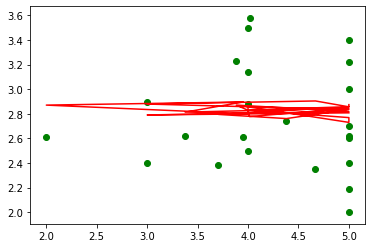

In [0]:

zz = X_test1[:,2]

plt.scatter(zz, y_test1,color='g')
y_pred1.shape
plt.plot(zz, y_pred1,color='r')



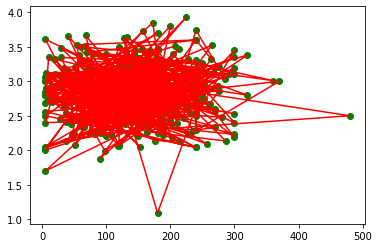

In [0]:

zz = X_train1[:,0]
plt.scatter(zz, y_train1,color='g')
y_pred1.shape
plt.plot(zz, y_train1,color='r')




In [0]:
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 0.36936160562430786
Mean Squared Error: 0.18944002481776231
Root Mean Squared Error: 0.43524708478950475


In [0]:
#df = pd.DataFrame({'Actual': y_test1[10], 'Predicted': X_test1[0]})
for i in range (23):
  print(y_test1[i])
  print("--------------")
  print(y_pred1[i])

[2.6]
--------------
[2.87437672]
[2.19]
--------------
[2.85666869]
[2.35249666]
--------------
[2.90437342]
[2.9]
--------------
[2.8793129]
[2.7]
--------------
[2.83559602]
[2.74381563]
--------------
[2.76122812]
[2.38227054]
--------------
[2.79497349]
[2.]
--------------
[2.85774545]
[2.88]
--------------
[2.83064257]
[2.62]
--------------
[2.76910934]
[3.]
--------------
[2.73030945]
[2.5]
--------------
[2.85652197]
[3.14]
--------------
[2.79928341]
[2.61]
--------------
[2.87070627]
[2.61464292]
--------------
[2.89614323]
[2.62290644]
--------------
[2.81366631]
[2.4]
--------------
[2.84484415]
[3.57922865]
--------------
[2.77765898]
[3.5]
--------------
[2.82881598]
[3.22933058]
--------------
[2.87088118]
[3.22]
--------------
[2.81896475]
[2.4]
--------------
[2.79065759]
[3.4]
--------------
[2.80785165]


In [0]:
P = [47.77031978,   8.30340601,   5.33225355],
y_pred2 = Regress1.predict(P)
#y_pred2

Reg_coef=Regress1.coef_
Reg_inte=Regress1.intercept_


##visualization Error

In [0]:
visul_merg = Merge_data2.tolist()


In [0]:
df = pd.DataFrame(visul_merg)
df_1=(df-df.mean())/df.std()

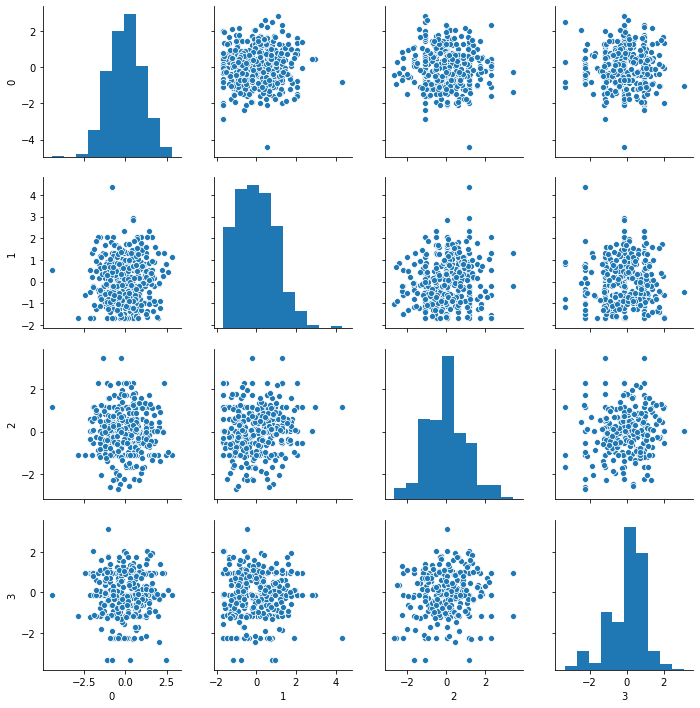

In [0]:
sb.pairplot(df_1)

##Thinking In Tensors_1 **ماعدا العاق عمر محمد **

In [0]:
#import torch


In [0]:
# x_features_1 = Merge_data2[:,1:4]
# y_labels_1 = Merge_data2[:,0:1]
# inputs = x_features_1#combined_features_1 #X_1 x_features_1
# targets = y_labels_1#combined_labels_1#Y_1 y_labels_1


In [0]:
# inputs = torch.from_numpy(inputs)
# targets = torch.from_numpy(targets)


In [0]:
# print(inputs)
# print(targets)

In [0]:
# w = torch.randn(1, 3, requires_grad=True)
# b = torch.randn(1, requires_grad=True)


In [0]:
# inputs.type()


In [0]:
# def model(x):
#     return x @ w.t() + b

In [0]:
# preds = model(inputs.float())


In [0]:
# print(preds)


In [0]:
# print(targets)


In [0]:
# def mse(t1, t2):
#     diff = t1 - t2
#     return torch.sum(diff * diff) / diff.numel()

In [0]:
# loss = mse(preds, targets)
# print(loss)

In [0]:
# loss.backward()


In [0]:
# print(w)


In [0]:
# print(w.grad)


In [0]:
# print(b)


In [0]:
# print(b.grad)


In [0]:
# w.grad.zero_()


In [0]:
# b.grad.zero_()

In [0]:
# preds = model(inputs.float())


In [0]:
# print(preds)


In [0]:
# loss = mse(preds, targets)


In [0]:
# print(loss)


In [0]:
# loss.backward()


In [0]:
# with torch.no_grad():
#     w -= w.grad * 1e-5
#     b -= b.grad * 1e-5
#     w.grad.zero_()
#     b.grad.zero_()

In [0]:
# print(w)


In [0]:
# preds = model(inputs.float())
# loss = mse(preds, targets)
# print(loss)

In [0]:
# for i in range(40000):
#     preds = model(inputs.float())
#     loss = mse(preds, targets)
#     loss.backward()
#     with torch.no_grad():
#         w -= w.grad * 1e-5
#         b -= b.grad * 1e-5
#         w.grad.zero_()
#         b.grad.zero_()

In [0]:
# preds = model(inputs.float())
# loss = mse(preds, targets)
# print(loss)

In [0]:
# preds


In [0]:
# targets

## Thinking In Tensors_2 ( Train Real Data )  **ماعدا العاق عمر محمد **

In [0]:
import torch
import torch.nn as nn


In [0]:
inputs_1 = torch.from_numpy(X_1)
targets_1 = torch.from_numpy(Y_1)


In [0]:
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.dataset import random_split


In [0]:
train_ds = TensorDataset(inputs_1.float(), targets_1.float())


In [0]:
train_ds[0:3]


(tensor([[240.,   4.,   4.],
         [120.,   7.,   5.],
         [ 30.,   4.,   5.]]), tensor([[2.0400],
         [3.2200],
         [2.9200]]))

In [0]:
train_ds[0:]

(tensor([[240.0000,   4.0000,   4.0000],
         [120.0000,   7.0000,   5.0000],
         [ 30.0000,   4.0000,   5.0000],
         [ 60.0000,   5.0000,   4.0000],
         [140.0000,   4.0000,   4.0000],
         [ 70.0000,   6.0000,   5.0000],
         [  5.0000,   5.0000,   5.0000],
         [210.0000,   7.0000,   3.0000],
         [200.0000,   4.0000,   1.0000],
         [ 60.0000,   4.0000,   2.0000],
         [ 95.0000,   6.0000,   3.0000],
         [210.0000,   8.0000,   1.0000],
         [180.0000,   6.0000,   5.0000],
         [  5.0000,   4.0000,   3.0000],
         [ 85.0000,   4.0000,   4.0000],
         [190.0000,   4.0000,   4.0000],
         [180.0000,   7.0000,   5.0000],
         [ 60.0000,   7.0000,   4.0000],
         [ 15.0000,   8.0000,   5.0000],
         [120.0000,   4.0000,   4.0000],
         [ 80.0000,   4.8000,   5.0000],
         [120.0000,   3.0000,   4.0000],
         [ 90.0000,   7.0000,   5.0000],
         [210.0000,   6.0000,   5.0000],
         [ 50.00

In [0]:
len(train_ds)

242

In [0]:
# def random_split_1(dataset, lengths):
#     """
#     Randomly split a dataset into non-overlapping new datasets of given lengths.
#     Arguments:
#         dataset (Dataset): Dataset to be split
#         lengths (sequence): lengths of splits to be produced
#     """
#     if sum(lengths) != len(dataset):
#         raise ValueError("Sum of input lengths does not equal the length of the input dataset!")

#     indices = randperm(sum(lengths)).tolist()
#     return [Subset(dataset, indices[offset - length:offset]) for offset, length in zip(_accumulate(lengths), lengths)]

In [0]:
train_dataset, val_dataset = random_split(train_ds, [230,12])

In [0]:
train_dl = DataLoader(dataset=train_dataset, batch_size=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=3)

In [0]:
# batch_size = 3
# train_dl = DataLoader(train_ds, batch_size, shuffle=True)
# next(iter(train_dl))

In [0]:
model_1 = nn.Linear(3, 1)


In [0]:
print(model_1.weight)
print(model_1.bias)

Parameter containing:
tensor([[-0.0800,  0.0095,  0.2718]], requires_grad=True)
Parameter containing:
tensor([0.4425], requires_grad=True)


In [0]:
opt = torch.optim.SGD(model_1.parameters(), lr=1e-5)


In [0]:
import torch.nn.functional as F


In [0]:
loss_fn = F.mse_loss


In [0]:
loss = loss_fn(model_1(inputs_1.float()), targets_1.float())
print(loss)

tensor(188.7138, grad_fn=<MseLossBackward>)


In [0]:
val_losses = []


In [0]:

len(val_losses)

0

In [0]:
def fit_1(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
        with torch.no_grad():
         for x_val, y_val in val_loader:
            # x_val = x_val.to(device)
            # y_val = y_val.to(device)
            
            model.eval()

            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())

    print('Training loss: ', loss_fn(model(inputs_1.float()), targets_1.float()))


In [0]:
fit_1(300, model_1, loss_fn, opt)


Training loss:  tensor(0.3468, grad_fn=<MseLossBackward>)


In [0]:
preds_1 = model_1(inputs_1.float())
#preds.shape
#bo = np.array([[60.,  6.,  5.]]) # trying to insert valdiation test
#bingo = torch.from_numpy(bo) # converting it to tensors to be able to insert it in model
#preds_1 = model_1(bingo.float())


In [0]:
#val_dataset[0]

In [0]:
data.head

<bound method NDFrame.head of       GPA  Per_min_OnRoad  Per_hours_At_College  Per_days_attendance
0    2.04             240                   4.0                  4.0
1    3.22             120                   7.0                  5.0
2    2.92              30                   4.0                  5.0
3    3.50              60                   5.0                  4.0
4    2.86             140                   4.0                  4.0
..    ...             ...                   ...                  ...
237  3.03             120                   4.0                  5.0
238  2.68             120                   4.0                  4.0
239  2.50              45                   3.0                  1.0
240  2.65              35                   4.0                  2.0
241  3.30             200                   6.0                  4.0

[242 rows x 4 columns]>

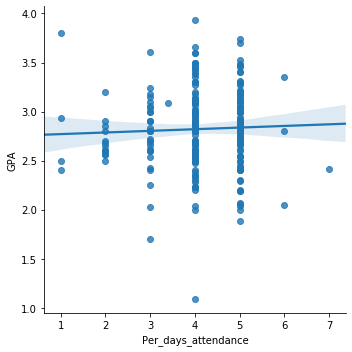

In [0]:
sb.lmplot(x="Per_days_attendance", y="GPA", data=data)

In [0]:
preds_1

tensor([[2.9023],
        [3.2596],
        [2.7236],
        [2.5907],
        [2.6688],
        [3.0342],
        [2.7738],
        [2.8466],
        [1.8743],
        [1.8589],
        [2.4695],
        [2.3321],
        [3.2911],
        [2.0421],
        [2.5404],
        [2.7856],
        [3.3997],
        [2.8080],
        [3.1231],
        [2.6221],
        [2.9272],
        [2.5135],
        [3.1896],
        [3.3611],
        [2.5817],
        [3.2281],
        [3.4770],
        [3.2210],
        [2.5054],
        [3.1968],
        [2.6679],
        [3.0971],
        [2.8237],
        [3.4626],
        [2.9992],
        [2.9795],
        [3.1510],
        [3.0729],
        [2.4739],
        [2.4102],
        [3.1626],
        [2.4578],
        [3.1663],
        [2.2737],
        [2.5907],
        [3.5541],
        [3.3682],
        [3.2084],
        [3.1626],
        [2.4738],
        [3.1897],
        [2.2172],
        [2.6841],
        [3.1510],
        [2.7227],
        [3

In [0]:
val_dataset[11]

(tensor([90., 10.,  5.]), tensor([2.8500]))

In [0]:
  preds_1 


tensor([[2.9023],
        [3.2596],
        [2.7236],
        [2.5907],
        [2.6688],
        [3.0342],
        [2.7738],
        [2.8466],
        [1.8743],
        [1.8589],
        [2.4695],
        [2.3321],
        [3.2911],
        [2.0421],
        [2.5404],
        [2.7856],
        [3.3997],
        [2.8080],
        [3.1231],
        [2.6221],
        [2.9272],
        [2.5135],
        [3.1896],
        [3.3611],
        [2.5817],
        [3.2281],
        [3.4770],
        [3.2210],
        [2.5054],
        [3.1968],
        [2.6679],
        [3.0971],
        [2.8237],
        [3.4626],
        [2.9992],
        [2.9795],
        [3.1510],
        [3.0729],
        [2.4739],
        [2.4102],
        [3.1626],
        [2.4578],
        [3.1663],
        [2.2737],
        [2.5907],
        [3.5541],
        [3.3682],
        [3.2084],
        [3.1626],
        [2.4738],
        [3.1897],
        [2.2172],
        [2.6841],
        [3.1510],
        [2.7227],
        [3

In [0]:
targets_1[189]

tensor([2.9000], dtype=torch.float64)

In [0]:
print(model_1.weight)
print(model_1.bias)
weights = model_1.weight
bias = model_1.bias

Parameter containing:
tensor([[0.0023, 0.1086, 0.3116]], requires_grad=True)
Parameter containing:
tensor([0.6612], requires_grad=True)


In [0]:
weights_1 = weights.detach().numpy()
bias_1 = bias.detach().numpy()

In [0]:
targets_1.shape

torch.Size([242, 1])

In [0]:
preds_1[1] #targets_1[1]


tensor([3.2596], grad_fn=<SelectBackward>)

In [0]:
targets_1[1]

tensor([3.2200], dtype=torch.float64)

In [0]:
preds_1[1]

tensor([3.2596], grad_fn=<SelectBackward>)

In [0]:
targets_1[1]

tensor([3.2200], dtype=torch.float64)

In [0]:
#Final_Data.shape

## Combine And Generate Labels

1.   Combine Generate Data And Real Data 
2.   Get weights and Intercept then Mutliply with Generated data(Features)



**Get weights and Intercept then Mutliply with Generated data**

In [0]:
Final_Data2 = Final_Data.tolist()

In [0]:
fd = pd.DataFrame(Final_Data2)

In [0]:
fd_1 = fd.drop([0], axis=1)

In [0]:
fd.insert(0, "0", 1) 


In [0]:
Final_Data3 = np.array(fd)

In [0]:
Final_Data3 #generated data  

array([[  1.        ,  71.41829135,   6.12438827,   3.616302  ],
       [  1.        ,  70.78243139,   4.35564079,   5.16298993],
       [  1.        , 170.6841854 ,   7.09551224,   3.5189119 ],
       ...,
       [  1.        , 248.21715481,   2.91041572,   4.84840501],
       [  1.        ,  25.22266026,   8.6172352 ,   4.1127663 ],
       [  1.        , 137.47031705,   6.0734833 ,   4.03694253]])

In [0]:
weights_1
bias_1

array([0.66118085], dtype=float32)

In [0]:
ws1 = weights_1[0][0]
ws2 = weights_1[0][1]
ws3 = weights_1[0][2]
bs = bias_1[0]

In [0]:
betas = np.array([bs,ws1,ws2,ws3])
betas

array([0.66118085, 0.00233492, 0.10863376, 0.31155986], dtype=float32)

In [0]:
new_Gpas = np.dot(Final_Data3,betas)
new_Gpas_shape = new_Gpas.shape[0]


In [0]:
new_Gpas = np.reshape(new_Gpas,(new_Gpas_shape,1))

  **combine between Generated data and Real Data** 

In [0]:
#Final_Data3

In [0]:
#fd_2 = pd.DataFrame(Final_Data3)
#fd_3 = fd_2.drop([0], axis=1)

In [0]:
#gen_1 = np.array(fd_3)


In [0]:
combined_features_1  = np.concatenate((X_1,Final_Data), axis=0)


In [0]:
combined_labels_1 =np.concatenate((Y_1,new_Gpas), axis=0)

## Thinking In Tensors_2 ( Train Real Data And Generated Data )  **ماعدا العاق عمر محمد **

In [0]:
inputs = torch.from_numpy(combined_features_1)
targets = torch.from_numpy(combined_labels_1)

In [0]:
train_ds = TensorDataset(inputs.float(), targets.float())


In [0]:
train_ds[0:3]


(tensor([[240.,   4.,   4.],
         [120.,   7.,   5.],
         [ 30.,   4.,   5.]]), tensor([[2.0400],
         [3.2200],
         [2.9200]]))

In [0]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[120.0000,   4.0000,   4.0000],
         [266.7943,   3.0995,   5.6301],
         [149.4800,   7.2055,   4.1797],
         [166.8932,   6.8856,   3.0372],
         [185.4135,   2.9302,   1.6805]]), tensor([[2.5100],
         [3.3749],
         [3.0952],
         [2.7451],
         [1.9360]])]

In [0]:
model = nn.Linear(3, 1)


In [0]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)


In [0]:
loss_fn = F.mse_loss


In [0]:
loss = loss_fn(model(inputs.float()), targets.float())
loss.type()

'torch.FloatTensor'

In [0]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs.float()), targets.float()))


In [0]:
fit(150, model, loss_fn, opt)


Training loss:  tensor(0.1407, grad_fn=<MseLossBackward>)


In [0]:
preds = model(inputs.float())
#preds.shape


In [0]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.0017, 0.1201, 0.3619]], requires_grad=True)
Parameter containing:
tensor([0.3617], requires_grad=True)


In [0]:
preds[1]

tensor([3.2199], grad_fn=<SelectBackward>)

In [0]:
targets[1]

tensor([3.2200], dtype=torch.float64)

# Save Model

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
model_save_name = 'predict_linear_reg.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model_1.state_dict(), path)
